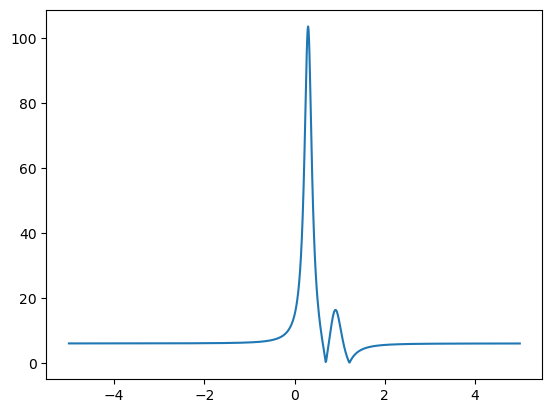

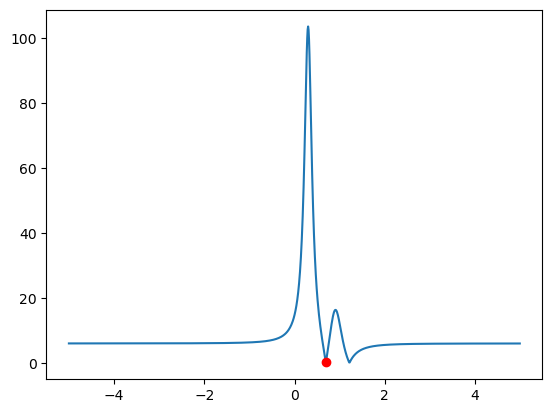

mhumps函数的最优值为: [0.69121773]


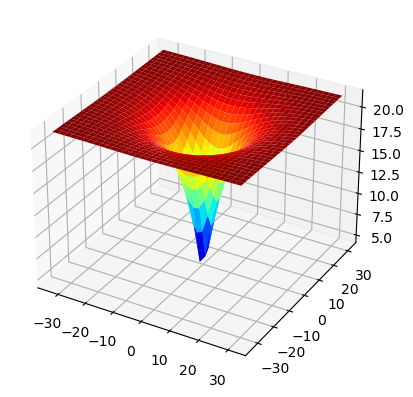

achley函数的最优值为: [0.00132147 0.00132147]


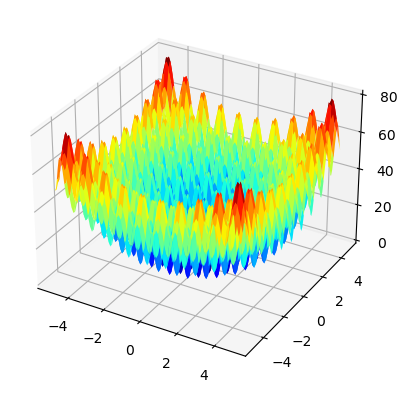

rastrigin函数的最优值为: [0, 0]


In [4]:
import numpy as np
from matplotlib import pyplot as plt

# mhumps函数
def mhumps(x):
    return abs(-1 / ((x - 0.3) ** 2 + 0.01) + 1 / ((x - 0.9) ** 2 + 0.04) - 6)

# achley函数
def achley(x, y):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))) \
        - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) \
        + np.exp(1) + 20

# rastrigin函数
def rastrigin(x, y):
    return 20 + x ** 2 - 10 * np.cos(2 * np.pi * x) + y ** 2 - 10 * np.cos(2 * np.pi * y)

# 最优化函数
def opt(f, x0, max_iter=1000, tol=1e-6):
    """
    利用牛顿法最优化方法求解函数的最优值和最优解
    f: 要优化的目标函数
    x0: 初始点
    max_iter: 最大迭代次数
    tol: 收敛精度
    """
    x = x0
    for i in range(max_iter):
        # 计算函数值f(x)
        fx = f(*x)
        # 计算梯度向量
        g = np.array([f(*(x + dx)) - fx for dx in np.eye(len(x))]) / 1e-6
        # 计算海森矩阵
        H = np.array([[f(*(x + dx1 + dx2)) - f(*(x + dx1)) - f(*(x + dx2)) + fx for dx2 in np.eye(len(x))] for dx1 in
                      np.eye(len(x))]) / 1e-6 ** 2
        # 使用牛顿法更新x的值
        x_new = x - np.linalg.inv(H) @ g
        # 判断是否收敛
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x, f(*x)

if __name__ == '__main__':
    # plot mhumps function
    x = np.arange(-5, 5, 0.01)
    y = mhumps(x)
    plt.plot(x, y)
    plt.show()

    # 求解 mhumps 函数的最小值
    opt_x, opt_y = opt(mhumps, [0.69])

    # 标记最优点
    plt.plot(x, y)
    plt.plot(opt_x, opt_y, 'ro')
    plt.show()

    print("mhumps函数的最优值为:", opt_x)

    # plot achley function
    r_min, r_max = -32.768, 32.768
    xaxis = np.arange(r_min, r_max, 2.0)
    yaxis = np.arange(r_min, r_max, 2.0)
    x, y = np.meshgrid(xaxis, yaxis)
    results = achley(x, y)
    figure = plt.figure()
    axis = figure.add_subplot(111, projection='3d')
    axis.plot_surface(x, y, results, cmap='jet', shade=False)
    plt.show()

    # 求解 achley 函数的最小值
    opt_xy, opt_z = opt(achley, [0, 0])

    # 标记最优点
    axis.plot([opt_xy[0]], [opt_xy[1]], [opt_z], 'ro')
    plt.show()

    print("achley函数的最优值为:", opt_xy)

    # plot rastrigin function
    r_min, r_max = -5, 5
    xaxis = np.arange(r_min, r_max, 0.1)
    yaxis = np.arange(r_min, r_max, 0.1)
    x, y = np.meshgrid(xaxis, yaxis)
    results1 = rastrigin(x, y)
    figure = plt.figure()
    axis = figure.add_subplot(111, projection='3d')
    axis.plot_surface(x, y, results1, cmap='jet', shade=False)
    plt.show()

    # 求解 rastrigin 函数的最小值
    opt_xy, opt_z = opt(rastrigin, [0, 0])

    # 标记最优点
    axis.plot([opt_xy[0]], [opt_xy[1]], [opt_z], 'ro')
    plt.show()

    print("rastrigin函数的最优值为:", opt_xy)
